# **Kelompok 3**

## **Anggota Kelompok**

Fatah Abdi Prakoso - 205150201111046

Noverdi Anugrah Ramadhan - 205150200111059

Aurelia Sukianto - 205150200111068

Diana Ayu Sukma Putri - 205150201111056

Safinatunnajah Mutiara Putri - 205150200111040

## **Data Understanding & Analysis**

### Deskripsi Dataset

Link Dataset: https://www.kaggle.com/datasets/mysarahmadbhat/lung-cancer

<br>

Total no. of attributes:16
No .of instances:284
Attribute information:

Gender: M(male), F(female)

Age: Age of the patient

Smoking: YES=2 , NO=1.

Yellow fingers: YES=2 , NO=1.

Anxiety: YES=2 , NO=1.

Peer_pressure: YES=2 , NO=1.

Chronic Disease: YES=2 , NO=1.

Fatigue: YES=2 , NO=1.

Allergy: YES=2 , NO=1.

Wheezing: YES=2 , NO=1.

Alcohol: YES=2 , NO=1.

Coughing: YES=2 , NO=1.

Shortness of Breath: YES=2 , NO=1.

Swallowing Difficulty: YES=2 , NO=1.

Chest pain: YES=2 , NO=1.

Lung Cancer: YES , NO.

### Data Collecting

In [ ]:
! wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1zlq2PbIZbVy1bGuO6emIUjXdkLMDXtl7' -O 'dataset_lung_cancer.csv'

--2022-12-29 07:35:51--  https://docs.google.com/uc?export=download&id=1zlq2PbIZbVy1bGuO6emIUjXdkLMDXtl7
Resolving docs.google.com (docs.google.com)... 108.177.119.101, 108.177.119.113, 108.177.119.102, ...
Connecting to docs.google.com (docs.google.com)|108.177.119.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0o-3o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/nck0bkp65ssccst48hgjolf1l4tfv7lr/1672299300000/12768932441768825715/*/1zlq2PbIZbVy1bGuO6emIUjXdkLMDXtl7?e=download&uuid=d7a1f199-ef83-4827-a89a-ab5316d20377 [following]
--2022-12-29 07:35:51--  https://doc-0o-3o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/nck0bkp65ssccst48hgjolf1l4tfv7lr/1672299300000/12768932441768825715/*/1zlq2PbIZbVy1bGuO6emIUjXdkLMDXtl7?e=download&uuid=d7a1f199-ef83-4827-a89a-ab5316d20377
Resolving doc-0o-3o-docs.googleusercontent.com (doc-0o-3o-docs.googleusercontent.com)... 108.177.119.132, 2a00:

In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv('dataset_lung_cancer.csv')
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


### Data Visualization

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

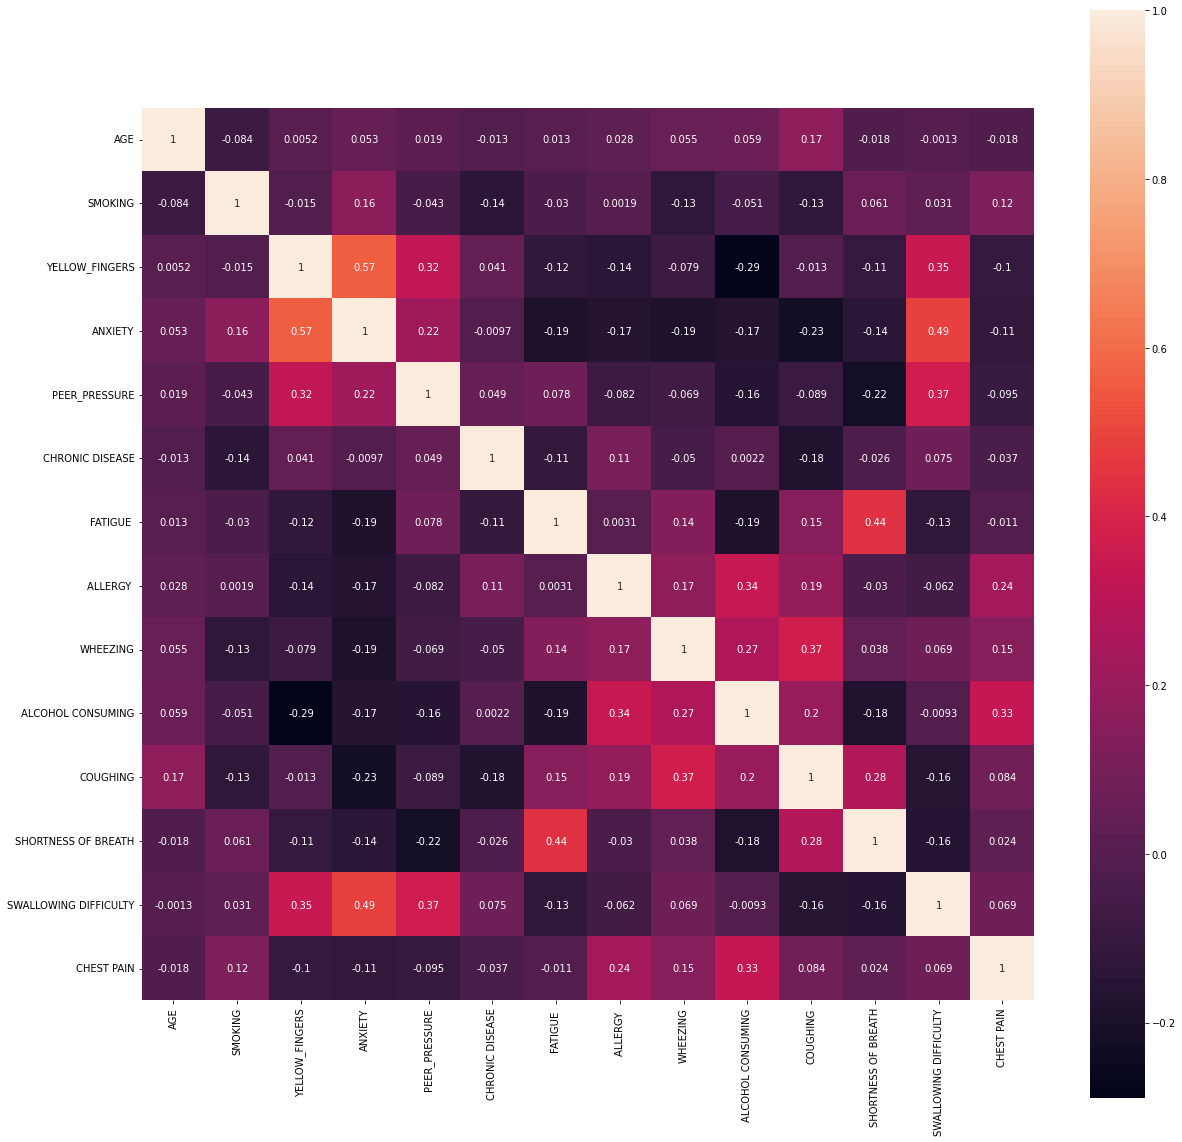

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(20,20)
sns.heatmap(data.corr(), square = True, annot = True)

## **Data Preprocessing**

######Memisahkan kolom kelas dan mengubah label pada kolom kelas Lung_Cancer menjadi 0 untuk NO dan 1 untuk YES

In [ ]:
label = data.pop('LUNG_CANCER')
label = label.replace(['NO', 'YES'], [0, 1])
label.unique()

array([1, 0])

###### Melakukan *binning* pada data `Age` ke dalam 2 kategori usia dipisahkan dengan *median*

In [ ]:
bins = np.array([data['AGE'].min(), data['AGE'].median(), data['AGE'].max()])
categories = [0, 1]
data['AGE'] = pd.cut(data['AGE'], bins, labels=categories, include_lowest=True).astype('int')
data['AGE'].unique()

array([1, 0])

######Mengganti label pada fitur Gender menjadi 0 untuk Female dan 1 untuk Male

In [ ]:
data['GENDER'] = data['GENDER'].replace(['F', 'M'], [0, 1])
data['GENDER'].unique()

array([1, 0])

######Mengubah nilai fitur biner lainnya menjadi 0 untuk False (awalnya 1) dan 1 untuk True (awalnya 2)

In [ ]:
for column in data.columns[2:]:
    data[column] = data[column].replace([1, 2], [0, 1])

######Mengecek isi dataframe

In [ ]:
data.describe()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,0.524272,0.491909,0.563107,0.569579,0.498382,0.501618,0.504854,0.673139,0.556634,0.556634,0.556634,0.579288,0.640777,0.469256,0.556634
std,0.500221,0.500745,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


######Melakukan *oversampling* pada data

Melihat rasio label data

In [ ]:
from collections import Counter

c = Counter(label)
print(c)
print(f'Rasio: {c[0]/c[1]}')

Counter({1: 270, 0: 39})
Rasio: 0.14444444444444443


Visualisasi data dalam *pie chart* sebelum dilakukan *oversampling*

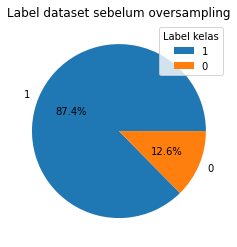

In [ ]:
plt.pie(c.values(), labels=c.keys(), autopct='%1.1f%%')
plt.title('Label dataset sebelum oversampling')
plt.legend(title='Label kelas')
plt.show()

Karena data tidak seimbang (imbalance), maka dilakukan oversampling. Di sini SMOTE digunakan untuk oversampling

Visualisasi data dalam pie chart setelah dilakukan oversampling dengan SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE(random_state=10)
data, label = oversample.fit_resample(data, label)

c = Counter(label)
print(c)
print(f'Rasio: {c[0]/c[1]}')

Counter({1: 270, 0: 270})
Rasio: 1.0


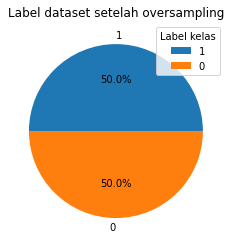

In [ ]:
plt.pie(c.values(), labels=c.keys(), autopct='%1.1f%%')
plt.title('Label dataset setelah oversampling')
plt.legend(title='Label kelas')
plt.show()

Plot data dengan fitur tereduksi

<function matplotlib.pyplot.show(*args, **kw)>

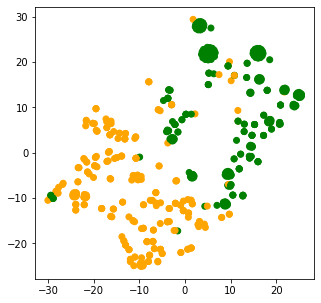

In [ ]:
from sklearn.manifold import TSNE

data_viz = data.copy()
label_vis = label.copy()

data_embedded =  TSNE(n_components=2, learning_rate='auto', init='random', random_state=50).fit_transform(data_viz[data_viz.columns[1:-1]].to_numpy())
plt.figure(figsize=(5,5))
plt.scatter(data_embedded.T[0], data_embedded.T[1], c=label.replace([0,1],['g','orange']), cmap='viridis')
plt.show

Membagi Dataframe menjadi data latih dan data uji

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import minmax_scale

X = minmax_scale(data)
y = label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=label)

## **Modeling & Evaluation**

### Fungsi Evaluasi

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

def supervisedEvaluation(a, b):

  print('Confusion Matrix:')
  print(confusion_matrix(a,b))

  print('\nAccuracy Score:')
  accuracy = accuracy_score(a,b)
  print(accuracy)

  print('\nClassification Report:')
  print(classification_report(a,b))

  display = ConfusionMatrixDisplay(confusion_matrix(a,b))
  display.plot()

###ADALINE

#### Klas Model Adaline

In [ ]:
import sys
import numpy as np
import random
import matplotlib.pyplot as plt

class Adaline:

  def __init__(self, max_epoch=100, max_error=0.1, learning_rate=0.1):
    self.mepoch = max_epoch
    self.merr = max_error
    self.lr = learning_rate
    self.w = 0

  def bipstep(self, y, th=0):
    return 1 if y >= th else -1

  def fit(self, d, t, verbose=False, draw=False):
    data = d.copy()
    t = t.copy().to_numpy()
    w = np.random.uniform(0, 1, len(data[0]) + 1)
    b = np.ones((len(data), 1))
    data = np.hstack((b, data))
    epoch = 1

    while epoch < self.mepoch:
      max_ch = -sys.maxsize

      if verbose: print('\nEpoch:', epoch)

      for r, row in enumerate(data):
        y = np.dot(row, w)

        for i in range(len(row)):
          w_new = w[i] + self.lr * (t[r] - y) * row[i]
          max_ch = max(abs(w[i] - w_new), max_ch)
          w[i] = w_new
        
      if verbose:
        print('max_error:',max_ch)
        print('Weight:', w)
        
      if max_ch < self.merr :break
      epoch += 1
    
    if verbose: print('Last epoch:', epoch)
    self.w = w

    return w

  def predict(self, test_data, th=0):
    w=0
    
    if len(self.w) == 0:
      print("fit first!")
      return
    else: w=self.w
    
    w = np.array(w)

    Y = []
  
    for x in test_data:
      y_in = w[0] + np.dot(x, w[1:])
      y = self.bipstep(y_in)
      Y.append(y)
      
    return np.array(Y)


#### Training

In [ ]:
y_train_bip = y_train.map(lambda x: -1 if x == 0 else 1)
adaline = Adaline(max_error=.001, max_epoch=500, learning_rate=.01)
model = adaline.fit(X_train, y_train_bip)

In [ ]:
adaline_predict_bip = adaline.predict(X_test)
adaline_predict = (adaline_predict_bip + 1)//2

#### Evaluasi

Confusion Matrix:
[[53 10]
 [ 1 44]]

Accuracy Score:
0.8981481481481481

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.84      0.91        63
           1       0.81      0.98      0.89        45

    accuracy                           0.90       108
   macro avg       0.90      0.91      0.90       108
weighted avg       0.91      0.90      0.90       108



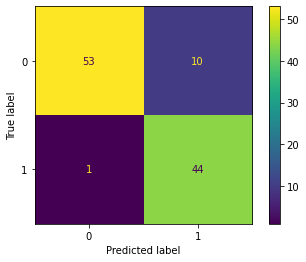

In [ ]:
supervisedEvaluation(adaline_predict,y_test)

###MADALINE

#### Klas Model Madaline

In [ ]:
def aktivasi(x):
  if x < 0:
    return -1
  else:
    return 1

def train(train_data, train_target, alpha=0.1, max_epoch=10):
    w = np.random.random((train_data.shape[1], 2))
    v = np.array([0.5, 0.5])
    b = np.random.random(2)
    b = np.append(b, 0.5)
    epoch = 0
    v_aktivasi = np.vectorize(aktivasi)
    weight_updated = True
    while weight_updated == True and epoch < max_epoch:
        weight_updated = False
        for data, target in zip(train_data, train_target):
            z_in = np.dot(data, w)
            z_in = z_in + b[:-1]
            z = v_aktivasi(z_in)
            y_in = np.dot(z, v) + b[-1]
            y = v_aktivasi(y_in)
            if y != target:
                weight_updated = True
                if target == 1:
                    index = np.argmin(np.abs(z_in))
                    b[index] = b[index] + alpha * (1 - z_in[index])
                    w[:, index] = w[:, index] + alpha * (1 - z_in[index]) * data
                elif target == -1:
                    index = np.where(z_in > 0)[0]
                    if len(index) == 1:
                        index = index[0]
                    b[index] = b[index] + alpha * (-1 - z_in[index])
                    w[:, index] = w[:, index] + alpha * (-1 - z_in[index]) * data[index]
        epoch = epoch + 1
    return (w, v, b)

In [ ]:
def test(w, v, b, test_data):
    v_aktivasi = np.vectorize(aktivasi)
    z_in = np.dot(test_data, w)
    z_in = z_in + b[:-1]
    z = v_aktivasi(z_in)
    y_in = np.dot(z, v) + b[-1]
    y = v_aktivasi(y_in)
    return y

#### Training

In [ ]:
m_target = y_train.map(lambda x: -1 if x == 0 else 1).to_numpy()
(w,v,b) = train(X_train,m_target,alpha=0.01,max_epoch=1000)
m_output_bip = test(w,v,b,X_test)
m_output = (m_output_bip + 1)//2

#### Evaluasi

Confusion Matrix:
[[51 14]
 [ 3 40]]

Accuracy Score:
0.8425925925925926

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.78      0.86        65
           1       0.74      0.93      0.82        43

    accuracy                           0.84       108
   macro avg       0.84      0.86      0.84       108
weighted avg       0.86      0.84      0.84       108



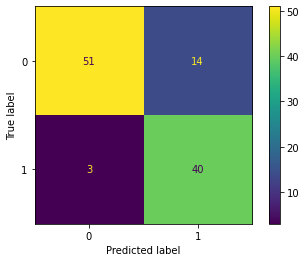

In [ ]:
supervisedEvaluation(m_output,y_test.to_numpy())

###SOM

#### Algoritma SOM

In [ ]:
from sklearn.preprocessing import minmax_scale
from sklearn.metrics import silhouette_score
import numpy as np

def som(X, lrate, b, max_epoch, n_cluster):
  data = X.copy()
  centroids = np.random.uniform(size=(n_cluster, len(X[0])))
  epoch = 0
  labels = []

  while epoch < max_epoch:
    for x in data:
      d = [sum((w - x) ** 2) for w in centroids]
      min = np.argmin(d)
      centroids[min] += lrate * (x - centroids[min])

    lrate *= b
    epoch += 1

  for x in data:
    d = [sum((w - x) ** 2) for w in centroids]
    min = np.argmin(d)

    labels.append(min)

  return centroids, labels

def predict(centroids, data):
  clusters = []
  for row in data:
    distances = [sum((w - row) ** 2) for w in centroids]
    clusters.append(np.argmin(distances))
  return clusters

def draw(X, target, centroids):
  colors = 'rgbcmyk'
  for x, label in zip(X, target):
    plt.plot(x[0], x[1], colors[label] + '.')
    
  plt.plot(centroids[:, 0], centroids[:, 1], 'kx')

#### Training

In [ ]:
target = label
centroids, labels = som(X_train, lrate=.05, b=.05, max_epoch=3, n_cluster=2)
y_pred = predict(centroids, X_test)
if accuracy_score(y_pred, y_test) < 0.5:
  y_pred = list(map(lambda x: 1 if x == 0 else 0, y_pred))

#### Evaluasi

Confusion Matrix:
[[53 10]
 [ 1 44]]

Accuracy Score:
0.8981481481481481

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.84      0.91        63
           1       0.81      0.98      0.89        45

    accuracy                           0.90       108
   macro avg       0.90      0.91      0.90       108
weighted avg       0.91      0.90      0.90       108

Silhouette score: 0.18260676544900273


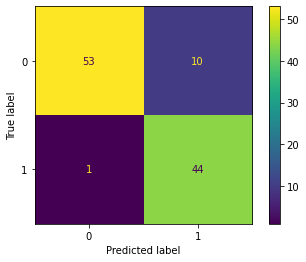

In [ ]:
supervisedEvaluation(y_pred, y_test)

silhouette = silhouette_score(X_train, labels)
print('Silhouette score:', silhouette)

###LVQ

#### Klas Model LVQ

In [ ]:
import numpy as np

class lvq:
  def lvq_fit(train, target, lrate, b, max_epoch):
    data = train.copy()
    label, train_idx = np.unique(target, return_index=True)
    weight = data[train_idx].astype(np.float64)
    data = np.array([e for i, e in enumerate(zip(data, target)) if i not in train_idx])
    data, target = data[:, 0], data[:, 1]
    epoch = 0
    while epoch < max_epoch:
      for i, x in enumerate(data):
        distance = [sum((w - x) ** 2) for w in weight]
        min = np.argmin(distance)
        sign = 1 if target[i] == label[min] else -1
        weight[min] += sign * lrate * (x - weight[min])
      lrate *= b
      epoch += 1
    return weight, label

  def lvq_predict(X, model):
    center, label = model
    Y = []

    for x in X:
      d = [sum((c - x) ** 2) for c in center]
      Y.append(label[np.argmin(d)])
    return Y
    
  def calc_accuracy(a, b):
    s = [1 if a[i] == b[i] else 0 for i in range(len(a))]
    return sum(s) / len(a)

#### Training

In [ ]:
lvq_model = lvq.lvq_fit(X_train, y_train, lrate=.5, b=.8, max_epoch=50)

In [ ]:
lvq_output = lvq.lvq_predict(X_test, lvq_model)

#### Evaluation

Confusion Matrix:
[[52  5]
 [ 2 49]]

Accuracy Score:
0.9351851851851852

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.91      0.94        57
           1       0.91      0.96      0.93        51

    accuracy                           0.94       108
   macro avg       0.94      0.94      0.94       108
weighted avg       0.94      0.94      0.94       108



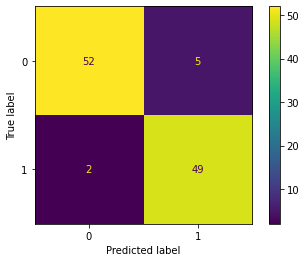

In [ ]:
supervisedEvaluation(lvq_output, y_test)

### Backpropagation

#### Klas model Backpropagation

In [ ]:
class Backpropagation:
    def __init__(self, layer_conf, seed=10):
        self.layer_conf = layer_conf
        self.seed = seed
        self.w = None

    def _sig(self, X):
        return [1 / (1 + np.exp(-x)) for x in X]

    def _sigd(self, X):
        output = []
        for i, x in enumerate(X):
            s = self._sig([x])[0]
            output.append(s * (1 - s))
        return output
    
    def fit(self, X, target, max_epoch=-1, max_error=.1, learn_rate=.1, verbose=False):
        X = X.copy()
        target = target.copy()
        
        np.random.seed(self.seed)

        n_in = [np.empty(i) for i in self.layer_conf]
        n = [np.empty(j + 1) if i < len(self.layer_conf) - 1 else np.empty(j) for i, j in enumerate(self.layer_conf)]

        w = np.array([np.random.rand(self.layer_conf[i] + 1, self.layer_conf[i + 1]) for i in range(len(self.layer_conf) - 1)])
        d_w = [np.empty((self.layer_conf[i] + 1, self.layer_conf[i + 1])) for i in range(len(self.layer_conf) - 1)]

        d = [np.empty(s) for s in self.layer_conf[1:]]
        d_in = [np.empty(s) for s in self.layer_conf[1:-1]]

        epoch = 0
        mse = 1
        for i in range(0, len(n)-1):
            n[i][-1] = 1

        while (max_epoch == -1 or epoch < max_epoch) and mse > max_error:
            epoch += 1
            mse = 0

            for r in range(len(X)):
                n[0][:-1] = X[r]

                for L in range(1, len(self.layer_conf)):
                    n_in[L] = np.dot(n[L-1], w[L-1])
                    n[L][:len(n_in[L])] = self._sig(n_in[L])

                e = target[r] - n[-1]
                mse += sum(e ** 2)
                d[-1] = e * self._sigd(n_in[-1])
                d_w[-1] = learn_rate * d[-1] * n[-2].reshape((-1, 1))

                for L in range(len(self.layer_conf) - 1, 1, -1):
                    d_in[L-2] = np.dot(d[L-1], np.transpose(w[L-1][:-1]))
                    d[L-2] = d_in[L-2] * np.array(self._sigd(n_in[L-1]))
                    d_w[L-2] = (learn_rate * d[L-2]) * n[L-2].reshape((-1, 1))

                w += d_w

            mse /= len(X)

            if verbose and epoch % 100 == 0:
                print(f'Epoch {epoch}, MSE: {mse}')

        if verbose:
            print(f'Epoch {epoch}, MSE: {mse}')
        
        self.w = w


    def predict(self, X):
        if self.w is None:
            return None

        n = [np.empty(len(i)) for i in self.w]
        n_in = [np.empty(len(i[0])) for i in self.w]

        predict = []
        n.append(np.empty(len(self.w[-1][0])))

        for x in X:
            n[0][:-1] = x

            for L in range(0, len(self.w)):
                n_in[L] = np.dot(n[L], self.w[L])
                n[L + 1][:len(n_in[L])] = self._sig(n_in[L])

            predict.append(n[-1].copy())
            
        return predict

#### Training

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 

bp = Backpropagation(layer_conf=(15, 21, 1))

y_train_mapped = list(map(lambda x: [x], y_train))
bp.fit(X_train.copy(), y_train_mapped, max_error=.05)

bp_pred_raw = bp.predict(X_test)
bp_pred = [round(i[0]) for i in bp_pred_raw]

#### Evaluasi

Confusion Matrix:
[[52  2]
 [ 2 52]]

Accuracy Score:
0.9629629629629629

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        54
           1       0.96      0.96      0.96        54

    accuracy                           0.96       108
   macro avg       0.96      0.96      0.96       108
weighted avg       0.96      0.96      0.96       108



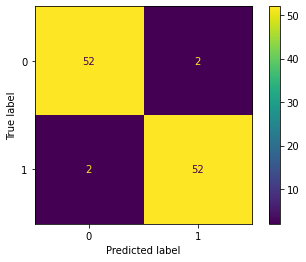

In [ ]:
supervisedEvaluation(bp_pred, y_test)